In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

np.set_printoptions(suppress=True)

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

theta_list = []
checkpoint_list = []

period = ['may-jun'] # inputs: 'may-jun', 'jun-jul'

# Import data

X_2014 = np.load('../data/processed/data_2014.npz')
N_2014 = X_2014['N']
    

X_2015 = np.load('../data/processed/data_2015.npz')
N_2015 = X_2015['N']
    

X_2016 = np.load('../data/processed/data_2016.npz')
N_2016 = X_2016['N']
    

X_2017 = np.load('../data/processed/data_2017.npz')
N_2017 = X_2017['N']

dist_2014 = X_2014['distance']
tI1_2014 = X_2014['tI1'].reshape(N_2014,1)
tI2_2014 = X_2014['tI2'].reshape(N_2014,1)
sI2_2014 = X_2014['sI2'].reshape(N_2014,1)

y_apr_2014 = X_2014['y_apr'].reshape(N_2014,1)
y_may_2014 = X_2014['y_may'].reshape(N_2014,1)
y_jun_2014 = X_2014['y_jun'].reshape(N_2014,1)
y_jul_2014 = X_2014['y_jul'].reshape(N_2014,1)

n_apr_2014 = X_2014['n_apr'].reshape(N_2014,1)
n_may_2014 = X_2014['n_may'].reshape(N_2014,1)
n_jun_2014 = X_2014['n_jun'].reshape(N_2014,1)
n_jul_2014 = X_2014['n_jul'].reshape(N_2014,1)

a_apr_2014 = X_2014['a_apr'].reshape(N_2014,1)
a_may_2014 = X_2014['a_may'].reshape(N_2014,1)
a_jun_2014 = X_2014['a_jun'].reshape(N_2014,1)
a_jul_2014 = X_2014['a_jul'].reshape(N_2014,1)

w_apr_2014 = X_2014['wind_apr']
w_may_2014 = X_2014['wind_may']
w_jun_2014 = X_2014['wind_jun']
w_jul_2014 = X_2014['wind_jul']

sI1_apr_2014 = X_2014['sI1_apr'].reshape(N_2014,1)
sI1_may_2014 = X_2014['sI1_may'].reshape(N_2014,1)
sI1_jun_2014 = X_2014['sI1_jun'].reshape(N_2014,1)
sI1_jul_2014 = X_2014['sI1_jul'].reshape(N_2014,1)

s_apr_2014 = X_2014['s_apr'].reshape(N_2014,1)
s_may_2014 = X_2014['s_may'].reshape(N_2014,1)
s_jun_2014 = X_2014['s_jun'].reshape(N_2014,1)
s_jul_2014 = X_2014['s_jul'].reshape(N_2014,1)

dist_2015 = X_2015['distance']
tI1_2015 = X_2015['tI1'].reshape(N_2015,1)
tI2_2015 = X_2015['tI2'].reshape(N_2015,1)
sI2_2015 = X_2015['sI2'].reshape(N_2015,1)

y_apr_2015 = X_2015['y_apr'].reshape(N_2015,1)
y_may_2015 = X_2015['y_may'].reshape(N_2015,1)
y_jun_2015 = X_2015['y_jun'].reshape(N_2015,1)
y_jul_2015 = X_2015['y_jul'].reshape(N_2015,1)

n_apr_2015 = X_2015['n_apr'].reshape(N_2015,1)
n_may_2015 = X_2015['n_may'].reshape(N_2015,1)
n_jun_2015 = X_2015['n_jun'].reshape(N_2015,1)
n_jul_2015 = X_2015['n_jul'].reshape(N_2015,1)

a_apr_2015 = X_2015['a_apr'].reshape(N_2015,1)
a_may_2015 = X_2015['a_may'].reshape(N_2015,1)
a_jun_2015 = X_2015['a_jun'].reshape(N_2015,1)
a_jul_2015 = X_2015['a_jul'].reshape(N_2015,1)

w_apr_2015 = X_2015['wind_apr']
w_may_2015 = X_2015['wind_may']
w_jun_2015 = X_2015['wind_jun']
w_jul_2015 = X_2015['wind_jul']

sI1_apr_2015 = X_2015['sI1_apr'].reshape(N_2015,1)
sI1_may_2015 = X_2015['sI1_may'].reshape(N_2015,1)
sI1_jun_2015 = X_2015['sI1_jun'].reshape(N_2015,1)
sI1_jul_2015 = X_2015['sI1_jul'].reshape(N_2015,1)

s_apr_2015 = X_2015['s_apr'].reshape(N_2015,1)
s_may_2015 = X_2015['s_may'].reshape(N_2015,1)
s_jun_2015 = X_2015['s_jun'].reshape(N_2015,1)
s_jul_2015 = X_2015['s_jul'].reshape(N_2015,1)


dist_2016 = X_2016['distance']
tI1_2016 = X_2016['tI1'].reshape(N_2016,1)
tI2_2016 = X_2016['tI2'].reshape(N_2016,1)
sI2_2016 = X_2016['sI2'].reshape(N_2016,1)

y_apr_2016 = X_2016['y_apr'].reshape(N_2016,1)
y_may_2016 = X_2016['y_may'].reshape(N_2016,1)
y_jun_2016 = X_2016['y_jun'].reshape(N_2016,1)
y_jul_2016 = X_2016['y_jul'].reshape(N_2016,1)

n_apr_2016 = X_2016['n_apr'].reshape(N_2016,1)
n_may_2016 = X_2016['n_may'].reshape(N_2016,1)
n_jun_2016 = X_2016['n_jun'].reshape(N_2016,1)
n_jul_2016 = X_2016['n_jul'].reshape(N_2016,1)

a_apr_2016 = X_2016['a_apr'].reshape(N_2016,1)
a_may_2016 = X_2016['a_may'].reshape(N_2016,1)
a_jun_2016 = X_2016['a_jun'].reshape(N_2016,1)
a_jul_2016 = X_2016['a_jul'].reshape(N_2016,1)

w_apr_2016 = X_2016['wind_apr']
w_may_2016 = X_2016['wind_may']
w_jun_2016 = X_2016['wind_jun']
w_jul_2016 = X_2016['wind_jul']

sI1_apr_2016 = X_2016['sI1_apr'].reshape(N_2016,1)
sI1_may_2016 = X_2016['sI1_may'].reshape(N_2016,1)
sI1_jun_2016 = X_2016['sI1_jun'].reshape(N_2016,1)
sI1_jul_2016 = X_2016['sI1_jul'].reshape(N_2016,1)

s_apr_2016 = X_2016['s_apr'].reshape(N_2016,1)
s_may_2016 = X_2016['s_may'].reshape(N_2016,1)
s_jun_2016 = X_2016['s_jun'].reshape(N_2016,1)
s_jul_2016 = X_2016['s_jul'].reshape(N_2016,1)

dist_2017 = X_2017['distance']
tI1_2017 = X_2017['tI1'].reshape(N_2017,1)
tI2_2017 = X_2017['tI2'].reshape(N_2017,1)
sI2_2017 = X_2017['sI2'].reshape(N_2017,1)

y_apr_2017 = X_2017['y_apr'].reshape(N_2017,1)
y_may_2017 = X_2017['y_may'].reshape(N_2017,1)
y_jun_2017 = X_2017['y_jun'].reshape(N_2017,1)
y_jul_2017 = X_2017['y_jul'].reshape(N_2017,1)

n_apr_2017 = X_2017['n_apr'].reshape(N_2017,1)
n_may_2017 = X_2017['n_may'].reshape(N_2017,1)
n_jun_2017 = X_2017['n_jun'].reshape(N_2017,1)
n_jul_2017 = X_2017['n_jul'].reshape(N_2017,1)

a_apr_2017 = X_2017['a_apr'].reshape(N_2017,1)
a_may_2017 = X_2017['a_may'].reshape(N_2017,1)
a_jun_2017 = X_2017['a_jun'].reshape(N_2017,1)
a_jul_2017 = X_2017['a_jul'].reshape(N_2017,1)

w_apr_2017 = X_2017['wind_apr']
w_may_2017 = X_2017['wind_may']
w_jun_2017 = X_2017['wind_jun']
w_jul_2017 = X_2017['wind_jul']

sI1_apr_2017 = X_2017['sI1_apr'].reshape(N_2017,1)
sI1_may_2017 = X_2017['sI1_may'].reshape(N_2017,1)
sI1_jun_2017 = X_2017['sI1_jun'].reshape(N_2017,1)
sI1_jul_2017 = X_2017['sI1_jul'].reshape(N_2017,1)

s_apr_2017 = X_2017['s_apr'].reshape(N_2017,1)
s_may_2017 = X_2017['s_may'].reshape(N_2017,1)
s_jun_2017 = X_2017['s_jun'].reshape(N_2017,1)
s_jul_2017 = X_2017['s_jul'].reshape(N_2017,1)

N = N_2014 + N_2015 + N_2016 + N_2017


# Concatenate data for all years for the auto-infection component
y_may = np.vstack((y_may_2014, y_may_2015, y_may_2016, y_may_2017))
y_jun = np.vstack((y_jun_2014, y_jun_2015, y_jun_2016, y_jun_2017))
y_jul = np.vstack((y_jul_2014, y_jul_2015, y_jul_2016, y_jul_2017))

n_may = np.vstack((n_may_2014, n_may_2015, n_may_2016, n_may_2017))
n_jun = np.vstack((n_jun_2014, n_jun_2015, n_jun_2016, n_jun_2017))
n_jul = np.vstack((n_jul_2014, n_jul_2015, n_jul_2016, n_jul_2017))

s_may = np.vstack((s_may_2014, s_may_2015, s_may_2016, s_may_2017))
s_jun = np.vstack((s_jun_2014, s_jun_2015, s_jun_2016, s_jun_2017))
s_jul = np.vstack((s_jul_2014, s_jul_2015, s_jul_2016, s_jul_2017))

tI1_all = np.vstack((tI1_2014, tI1_2015, tI1_2016, tI1_2017))
tI2_all = np.vstack((tI2_2014, tI2_2015, tI2_2016, tI2_2017))




# Function to normalize the data
def norm(x):
    
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Normalize the data
dist_2014 = norm(dist_2014)
dist_2015 = norm(dist_2015)
dist_2016 = norm(dist_2016)
dist_2017 = norm(dist_2017)

a_apr_2014 = norm(a_apr_2014)
a_may_2014 = norm(a_may_2014)
a_jun_2014 = norm(a_jun_2014)
a_jul_2014 = norm(a_jul_2014)

a_apr_2015 = norm(a_apr_2015)
a_may_2015 = norm(a_may_2015)
a_jun_2015 = norm(a_jun_2015)
a_jul_2015 = norm(a_jul_2015)

a_apr_2016 = norm(a_apr_2016)
a_may_2016 = norm(a_may_2016)
a_jun_2016 = norm(a_jun_2016)
a_jul_2016 = norm(a_jul_2016)

a_apr_2017 = norm(a_apr_2017)
a_may_2017 = norm(a_may_2017)
a_jun_2017 = norm(a_jun_2017)
a_jul_2017 = norm(a_jul_2017)

w_apr_2014 = norm(w_apr_2014)
w_may_2014 = norm(w_may_2014)
w_jun_2014 = norm(w_jun_2014)
w_jul_2014 = norm(w_jul_2014)

w_apr_2015 = norm(w_apr_2015)
w_may_2015 = norm(w_may_2015)
w_jun_2015 = norm(w_jun_2015)
w_jul_2015 = norm(w_jul_2015)

w_apr_2016 = norm(w_apr_2016)
w_may_2016 = norm(w_may_2016)
w_jun_2016 = norm(w_jun_2016)
w_jul_2016 = norm(w_jul_2016)

w_apr_2017 = norm(w_apr_2017)
w_may_2017 = norm(w_may_2017)
w_jun_2017 = norm(w_jun_2017)
w_jul_2017 = norm(w_jul_2017)


for period in period:

    if period == 'may-jun':
        y = y_jun
        n = n_jun
        
        y_lag = y_may
        n_lag = n_may
        
        a_lag_2014 = a_may_2014
        a_lag_2015 = a_may_2015
        a_lag_2016 = a_may_2016
        a_lag_2017 = a_may_2017
        
        w_lag_2014 = w_may_2014
        w_lag_2015 = w_may_2015
        w_lag_2016 = w_may_2016
        w_lag_2017 = w_may_2017
        
        sI1_lag_2014 = sI1_may_2014
        sI1_lag_2015 = sI1_may_2015
        sI1_lag_2016 = sI1_may_2016
        sI1_lag_2017 = sI1_may_2017
        
        s_lag = s_may
        
        z_lag_2014 = y_may_2014
        z_lag_2015 = y_may_2015
        z_lag_2016 = y_may_2016
        z_lag_2017 = y_may_2017
        
        nz_lag_2014 = n_may_2014
        nz_lag_2015 = n_may_2015
        nz_lag_2016 = n_may_2016
        nz_lag_2017 = n_may_2017
        
        sz_lag_2014 = s_may_2014
        sz_lag_2015 = s_may_2015
        sz_lag_2016 = s_may_2016
        sz_lag_2017 = s_may_2017
    
    elif period == 'jun-jul':
        
        y = y_jul
        n = n_jul
        
        y_lag = y_jun
        n_lag = n_jun
        
        a_lag_2014 = a_jun_2014
        a_lag_2015 = a_jun_2015
        a_lag_2016 = a_jun_2016
        a_lag_2017 = a_jun_2017
        
        w_lag_2014 = w_jun_2014
        w_lag_2015 = w_jun_2015
        w_lag_2016 = w_jun_2016
        w_lag_2017 = w_jun_2017
        
        sI1_lag_2014 = sI1_jun_2014
        sI1_lag_2015 = sI1_jun_2015
        sI1_lag_2016 = sI1_jun_2016
        sI1_lag_2017 = sI1_jun_2017
        
        s_lag = s_jun
        
        z_lag_2014 = y_jun_2014
        z_lag_2015 = y_jun_2015
        z_lag_2016 = y_jun_2016
        z_lag_2017 = y_jun_2017
        
        nz_lag_2014 = n_jun_2014
        nz_lag_2015 = n_jun_2015
        nz_lag_2016 = n_jun_2016
        nz_lag_2017 = n_jun_2017
        
        sz_lag_2014 = s_jun_2014
        sz_lag_2015 = s_jun_2015
        sz_lag_2016 = s_jun_2016
        sz_lag_2017 = s_jun_2017
        
    

    # Define the function eta() which takes input parameters theta and returns the log-odds of disease for each yard i in current time period
    def eta(theta_tilde):
            
        beta1, beta2 = theta_tilde[:2]
        delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = np.exp(theta_tilde[2:])
        
        beta1_array = np.full((N,1), beta1)
        beta2_array = np.full((N,1), beta2)
        
        auto_infection1 = delta1 * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        auto_infection2 = delta2 * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        dispersal1 = []
        dispersal2 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for j in range(0, Nz):
                
                dispersal_array = ((a_lag * (z_lag / nz_lag)) * (w_lag[:, j].reshape(Nz,1)))
                dispersal_array1 = dispersal_array * np.exp(-eta21 * sz_lag) * np.power(1 + dist[:, j].reshape(Nz,1), -alpha1) * sI1_lag
                dispersal_array2 = dispersal_array * np.exp(-eta22 * sz_lag) * np.power(1 + dist[:, j].reshape(Nz,1), -alpha2) * sI2
                dispersal_component1_i = gamma1 * (np.sum(dispersal_array1) - dispersal_array1[j][0])
                dispersal_component2_i = gamma2 * (np.sum(dispersal_array2) - dispersal_array2[j][0])
            
                dispersal1.append(dispersal_component1_i)
                dispersal2.append(dispersal_component2_i)
        
        dispersal1 = np.array(dispersal1).reshape(N,1)
        dispersal2 = np.array(dispersal2).reshape(N,1)
    
        eta = tI1_all * (beta1_array + auto_infection1 + dispersal1) + tI2_all * (beta2_array + auto_infection2 + dispersal2)
        
        return eta


    def costFunction(theta_tilde):
        
        neg_log_likelihood = -(1/N) * np.sum(y * eta(theta_tilde) - n * np.log(1 + np.exp(eta(theta_tilde))))
        
        return neg_log_likelihood

    
    

    def partial(theta_tilde):
        
        beta1, beta2 = theta_tilde[:2]
        delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = np.exp(theta_tilde[2:])
        
        d_beta1 = tI1_all
        d_beta2 = tI2_all
        
        d_delta1 = tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_delta2 = tI2_all * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_gamma1 = []
        d_gamma2 = []
        d_alpha1 = []
        d_alpha2 = []
        d_eta21 = []
        d_eta22 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
            
                mask = np.arange(Nz) != i # mask out the current yard i
            
                d_gamma1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask])
                d_gamma2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask])
                
                d_alpha1_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_alpha2_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])
                
                d_eta21_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask] * sz_lag[mask])
                d_eta22_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask] * sz_lag[mask])
            
                d_gamma1.append(d_gamma1_i)
                d_gamma2.append(d_gamma2_i)
                d_alpha1.append(d_alpha1_i)
                d_alpha2.append(d_alpha2_i)
                d_eta21.append(d_eta21_i)
                d_eta22.append(d_eta22_i)
        
        d_gamma1 = np.array(d_gamma1).reshape(N,1)
        d_gamma2 = np.array(d_gamma2).reshape(N,1)
        d_alpha1 = np.array(d_alpha1).reshape(N,1)
        d_alpha2 = np.array(d_alpha2).reshape(N,1)
        d_eta21 = np.array(d_eta21).reshape(N,1)
        d_eta22 = np.array(d_eta22).reshape(N,1)
        
        
        d_eta11 = -tI1_all * delta1 * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta12 = -tI2_all * delta2 * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)



        grad_entries = np.array([d_beta1, d_beta2, d_delta1, d_delta2, d_gamma1, d_gamma2, d_alpha1, d_alpha2, d_eta11, d_eta12, d_eta21, d_eta22])
        
        return grad_entries
    


    def partial_by_partial(theta_tilde):
        
        beta1, beta2 = theta_tilde[:2]
        delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = np.exp(theta_tilde[2:])
        
        d_beta1 = tI1_all
        d_beta2 = tI2_all
        
        d_delta1 = tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_delta2 = tI2_all* (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_eta11 = -tI1_all * delta1 * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta12 = -tI2_all * delta2 * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        
        d_gamma1 = []
        d_gamma2 = []
        d_alpha1 = []
        d_alpha2 = []
        d_eta21 = []
        d_eta22 = []
        
        for year in [2014, 2015, 2016, 2017]:
            
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
            
                mask = np.arange(Nz) != i # mask out the current yard i
            
                d_gamma1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask])
                d_gamma2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask])
                
                d_alpha1_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_alpha2_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])

                d_eta21_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask] * sz_lag[mask])
                d_eta22_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask] * sz_lag[mask])
                
                d_gamma1.append(d_gamma1_i)
                d_gamma2.append(d_gamma2_i)
                d_alpha1.append(d_alpha1_i)
                d_alpha2.append(d_alpha2_i)
                d_eta21.append(d_eta21_i)
                d_eta22.append(d_eta22_i)
        
        d_gamma1 = np.array(d_gamma1).reshape(N,1)
        d_gamma2 = np.array(d_gamma2).reshape(N,1)
        d_alpha1 = np.array(d_alpha1).reshape(N,1)
        d_alpha2 = np.array(d_alpha2).reshape(N,1)
        d_eta21 = np.array(d_eta21).reshape(N,1)
        d_eta22 = np.array(d_eta22).reshape(N,1)
            

        grad_entries = np.array([[d_beta1*d_beta1, d_beta2*d_beta1, d_delta1*d_beta1, d_delta2*d_beta1, d_gamma1*d_beta1, d_gamma2*d_beta1, d_alpha1*d_beta1, d_alpha2*d_beta1, d_eta11*d_beta1, d_eta12*d_beta1, d_eta21*d_beta1, d_eta22*d_beta1],
                                [d_beta1*d_beta2, d_beta2*d_beta2, d_delta1*d_beta2, d_delta2*d_beta2, d_gamma1*d_beta2, d_gamma2*d_beta2, d_alpha1*d_beta2, d_alpha2*d_beta2, d_eta11*d_beta2, d_eta12*d_beta2, d_eta21*d_beta2, d_eta22*d_beta2],
                                [d_beta1*d_delta1, d_beta2*d_delta1, d_delta1*d_delta1, d_delta2*d_delta1, d_gamma1*d_delta1, d_gamma2*d_delta1, d_alpha1*d_delta1, d_alpha2*d_delta1, d_eta11*d_delta1, d_eta12*d_delta1, d_eta21*d_delta1, d_eta22*d_delta1],
                                [d_beta1*d_delta2, d_beta2*d_delta2, d_delta1*d_delta2, d_delta2*d_delta2, d_gamma1*d_delta2, d_gamma2*d_delta2, d_alpha1*d_delta2, d_alpha2*d_delta2, d_eta11*d_delta2, d_eta12*d_delta2, d_eta21*d_delta2, d_eta22*d_delta2],
                                [d_beta1*d_gamma1, d_beta2*d_gamma1, d_delta1*d_gamma1, d_delta2*d_gamma1, d_gamma1*d_gamma1, d_gamma2*d_gamma1, d_alpha1*d_gamma1, d_alpha2*d_gamma1, d_eta11*d_gamma1, d_eta12*d_gamma1, d_eta21*d_gamma1, d_eta22*d_gamma1],
                                [d_beta1*d_gamma2, d_beta2*d_gamma2, d_delta1*d_gamma2, d_delta2*d_gamma2, d_gamma1*d_gamma2, d_gamma2*d_gamma2, d_alpha1*d_gamma2, d_alpha2*d_gamma2, d_eta11*d_gamma2, d_eta12*d_gamma2, d_eta21*d_gamma2, d_eta22*d_gamma2],
                                [d_beta1*d_alpha1, d_beta2*d_alpha1, d_delta1*d_alpha1, d_delta2*d_alpha1, d_gamma1*d_alpha1, d_gamma2*d_alpha1, d_alpha1*d_alpha1, d_alpha2*d_alpha1, d_eta11*d_alpha1, d_eta12*d_alpha1, d_eta21*d_alpha1, d_eta22*d_alpha1],
                                [d_beta1*d_alpha2, d_beta2*d_alpha2, d_delta1*d_alpha2, d_delta2*d_alpha2, d_gamma1*d_alpha2, d_gamma2*d_alpha2, d_alpha1*d_alpha2, d_alpha2*d_alpha2, d_eta11*d_alpha2, d_eta12*d_alpha2, d_eta21*d_alpha2, d_eta22*d_alpha2],
                                [d_beta1*d_eta11, d_beta2*d_eta11, d_delta1*d_eta11, d_delta2*d_eta11, d_gamma1*d_eta11, d_gamma2*d_eta11, d_alpha1*d_eta11, d_alpha2*d_eta11, d_eta11*d_eta11, d_eta12*d_eta11, d_eta21*d_eta11, d_eta22*d_eta11],
                                [d_beta1*d_eta12, d_beta2*d_eta12, d_delta1*d_eta12, d_delta2*d_eta12, d_gamma1*d_eta12, d_gamma2*d_eta12, d_alpha1*d_eta12, d_alpha2*d_eta12, d_eta11*d_eta12, d_eta12*d_eta12, d_eta21*d_eta12, d_eta22*d_eta12],
                                [d_beta1*d_eta21, d_beta2*d_eta21, d_delta1*d_eta21, d_delta2*d_eta21, d_gamma1*d_eta21, d_gamma2*d_eta21, d_alpha1*d_eta21, d_alpha2*d_eta21, d_eta11*d_eta21, d_eta12*d_eta21, d_eta21*d_eta21, d_eta22*d_eta21],
                                [d_beta1*d_eta22, d_beta2*d_eta22, d_delta1*d_eta22, d_delta2*d_eta22, d_gamma1*d_eta22, d_gamma2*d_eta22, d_alpha1*d_eta22, d_alpha2*d_eta22, d_eta11*d_eta22, d_eta12*d_eta22, d_eta21*d_eta22, d_eta22*d_eta22]])
        
        
        
        return grad_entries

    def partial_sq(theta_tilde):
        
        beta1, beta2 = theta_tilde[:2]
        delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = np.exp(theta_tilde[2:])
        
        # delta1 second derivatives
        
        d_delta1_d_eta11 = -tI1_all * (y_lag / n_lag) * np.exp(-eta11 * s_lag) * s_lag
        d_delta1_d_eta12 = 0
        d_delta2_d_eta11 = 0
        d_delta2_d_eta12 = -tI2_all * (y_lag / n_lag) * np.exp(-eta12 * s_lag) * s_lag
        d_gamma1_d_eta22 = 0
        d_gamma1_d_alpha2 = 0
        d_gamma2_d_eta21 = 0
        d_gamma2_d_alpha1 = 0
        d_alpha1_d_gamma2 = 0
        d_alpha1_d_eta22 = 0
        d_alpha1_d_alpha2 = 0
        d_alpha2_d_gamma1 = 0
        d_alpha2_d_eta21 = 0
        d_alpha2_d_alpha1 = 0
        d_eta11_d_delta1 = -tI1_all * s_lag * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta11_d_delta2 = 0
        d_eta11_d_eta11 = tI1_all * delta1 * (s_lag**2) * (y_lag / n_lag) * np.exp(-eta11 * s_lag)
        d_eta11_d_eta12 = 0
        d_eta12_d_delta1 = 0
        d_eta12_d_delta2 = -tI2_all * s_lag * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        d_eta12_d_eta11 = 0
        d_eta12_d_eta12 = tI2_all * delta2 * (s_lag**2) * (y_lag / n_lag) * np.exp(-eta12 * s_lag)
        d_eta21_d_gamma2 = 0
        d_eta21_d_eta22 = 0
        d_eta21_d_alpha2 = 0
        d_eta22_d_gamma1 = 0
        d_eta22_d_eta21 = 0
        d_eta22_d_alpha1 = 0
        
        # summations
        
        d_gamma1_d_eta21 = []
        d_gamma1_d_alpha1 = []
        d_gamma2_d_eta22 = []
        d_gamma2_d_alpha2 = []
        d_alpha1_d_gamma1 = []
        d_alpha1_d_eta21 = []
        d_alpha1_d_alpha1 = []
        d_alpha2_d_gamma2 = []
        d_alpha2_d_eta22 = []
        d_alpha2_d_alpha2 = []
        d_eta21_d_gamma1 = []
        d_eta21_d_eta21 = []
        d_eta21_d_alpha1 = []
        d_eta22_d_gamma2 = []
        d_eta22_d_eta22 = []
        d_eta22_d_alpha2 = []
        
        
        for year in [2014, 2015, 2016, 2017]:
        
            if year == 2014:
                dist = dist_2014
                sI2 = sI2_2014
                z_lag = z_lag_2014
                nz_lag = nz_lag_2014
                sz_lag = sz_lag_2014
                a_lag = a_lag_2014
                w_lag = w_lag_2014
                sI1_lag = sI1_lag_2014
                Nz = N_2014
                tI1 = tI1_2014
                tI2 = tI2_2014
                
            elif year == 2015:
                dist = dist_2015
                sI2 = sI2_2015
                z_lag = z_lag_2015
                nz_lag = nz_lag_2015
                sz_lag = sz_lag_2015
                a_lag = a_lag_2015
                w_lag = w_lag_2015
                sI1_lag = sI1_lag_2015
                Nz = N_2015
                tI1 = tI1_2015
                tI2 = tI2_2015
            
            elif year == 2016:
                dist = dist_2016
                sI2 = sI2_2016
                z_lag = z_lag_2016
                nz_lag = nz_lag_2016
                sz_lag = sz_lag_2016
                a_lag = a_lag_2016
                w_lag = w_lag_2016
                sI1_lag = sI1_lag_2016
                Nz = N_2016
                tI1 = tI1_2016
                tI2 = tI2_2016
                
            elif year == 2017:
                dist = dist_2017
                sI2 = sI2_2017
                z_lag = z_lag_2017
                nz_lag = nz_lag_2017
                sz_lag = sz_lag_2017
                a_lag = a_lag_2017
                w_lag = w_lag_2017
                sI1_lag = sI1_lag_2017
                Nz = N_2017
                tI1 = tI1_2017
                tI2 = tI2_2017
            
            for i in range(0, Nz):
                
                mask = np.arange(Nz) != i # mask out the current yard i
                
                d_gamma1_d_eta21_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask] * sz_lag[mask])
                d_gamma1_d_alpha1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_gamma2_d_eta22_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask] * sz_lag[mask])
                d_gamma2_d_alpha2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])
                d_alpha1_d_gamma1_i = tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask])
                d_alpha1_d_eta21_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_alpha1_d_alpha1_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * (np.log(1 + dist[:, i][mask].reshape(Nz-1, 1)))**2) * sI1_lag[mask])
                d_alpha2_d_gamma2_i = tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask])
                d_alpha2_d_eta22_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])
                d_alpha2_d_alpha2_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * (np.log(1 + dist[:, i][mask].reshape(Nz-1, 1)))**2) * sI2[mask])
                d_eta21_d_gamma1_i = -tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask] * sz_lag[mask])
                d_eta21_d_eta21_i = gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1)) * sI1_lag[mask] * (sz_lag[mask]**2))
                d_eta21_d_alpha1_i = -gamma1 * tI1[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta21 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha1) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI1_lag[mask] * sz_lag[mask])
                d_eta22_d_gamma2_i = -tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask] * sz_lag[mask])
                d_eta22_d_eta22_i = gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2)) * sI2[mask] * (sz_lag[mask]**2))
                d_eta22_d_alpha2_i = -gamma2 * tI2[i] * np.sum((a_lag[mask] * (z_lag[mask] / nz_lag[mask])) * np.exp(-eta22 * sz_lag[mask]) * (w_lag[:, i][mask].reshape(Nz-1, 1) * -np.power(1 + dist[:, i][mask].reshape(Nz-1, 1), -alpha2) * np.log(1 + dist[:, i][mask].reshape(Nz-1, 1))) * sI2[mask] * sz_lag[mask])

                d_gamma1_d_eta21.append(d_gamma1_d_eta21_i)
                d_gamma1_d_alpha1.append(d_gamma1_d_alpha1_i)
                d_gamma2_d_eta22.append(d_gamma2_d_eta22_i)
                d_gamma2_d_alpha2.append(d_gamma2_d_alpha2_i)
                d_alpha1_d_gamma1.append(d_alpha1_d_gamma1_i)
                d_alpha1_d_eta21.append(d_alpha1_d_eta21_i)
                d_alpha1_d_alpha1.append(d_alpha1_d_alpha1_i)
                d_alpha2_d_gamma2.append(d_alpha2_d_gamma2_i)
                d_alpha2_d_eta22.append(d_alpha2_d_eta22_i)
                d_alpha2_d_alpha2.append(d_alpha2_d_alpha2_i)
                d_eta21_d_gamma1.append(d_eta21_d_gamma1_i)
                d_eta21_d_eta21.append(d_eta21_d_eta21_i)
                d_eta21_d_alpha1.append(d_eta21_d_alpha1_i)
                d_eta22_d_gamma2.append(d_eta22_d_gamma2_i)
                d_eta22_d_eta22.append(d_eta22_d_eta22_i)
                d_eta22_d_alpha2.append(d_eta22_d_alpha2_i)
            
        d_gamma1_d_eta21 = np.array(d_gamma1_d_eta21).reshape((N, 1))
        d_gamma1_d_alpha1 = np.array(d_gamma1_d_alpha1).reshape((N, 1))
        d_gamma2_d_eta22 = np.array(d_gamma2_d_eta22).reshape((N, 1))
        d_gamma2_d_alpha2 = np.array(d_gamma2_d_alpha2).reshape((N, 1))
        d_alpha1_d_gamma1 = np.array(d_alpha1_d_gamma1).reshape((N, 1))
        d_alpha1_d_eta21 = np.array(d_alpha1_d_eta21).reshape((N, 1))
        d_alpha1_d_alpha1 = np.array(d_alpha1_d_alpha1).reshape((N, 1))
        d_alpha2_d_gamma2 = np.array(d_alpha2_d_gamma2).reshape((N, 1))
        d_alpha2_d_eta22 = np.array(d_alpha2_d_eta22).reshape((N, 1))
        d_alpha2_d_alpha2 = np.array(d_alpha2_d_alpha2).reshape((N, 1))
        d_eta21_d_gamma1 = np.array(d_eta21_d_gamma1).reshape((N, 1))
        d_eta21_d_eta21 = np.array(d_eta21_d_eta21).reshape((N, 1))
        d_eta21_d_alpha1 = np.array(d_eta21_d_alpha1).reshape((N, 1))
        d_eta22_d_gamma2 = np.array(d_eta22_d_gamma2).reshape((N, 1))
        d_eta22_d_eta22 = np.array(d_eta22_d_eta22).reshape((N, 1))
        d_eta22_d_alpha2 = np.array(d_eta22_d_alpha2).reshape((N, 1))
            
            
        
        zero = np.zeros((N, 1))
        
        hess_entries = np.array([[zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero],    #d_beta1
                                [zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero, zero],    #d_beta2
                                [zero, zero, zero, zero, zero, zero, zero, zero, d_eta11_d_delta1, zero, zero, zero],    #d_delta1
                                [zero, zero, zero, zero, zero, zero, zero, zero, zero, d_eta12_d_delta2, zero, zero],    #d_delta2
                                [zero, zero, zero, zero, zero, zero, d_alpha1_d_gamma1, zero, zero, zero, d_eta21_d_gamma1, zero],    #d_gamma1
                                [zero, zero, zero, zero, zero, zero, zero, d_alpha2_d_gamma2, zero, zero, zero, d_eta22_d_gamma2],    #d_gamma2
                                [zero, zero, zero, zero, d_gamma1_d_alpha1, zero, d_alpha1_d_alpha1, zero, zero, zero, d_eta21_d_alpha1, zero],    #d_alpha1
                                [zero, zero, zero, zero, zero, d_gamma2_d_alpha2, zero, d_alpha2_d_alpha2, zero, zero, zero, d_eta22_d_alpha2],    #d_alpha2
                                [zero, zero, d_delta1_d_eta11, zero, zero, zero, zero, zero, d_eta11_d_eta11, zero, zero, zero],    #d_eta11
                                [zero, zero, zero, d_delta2_d_eta12, zero, zero, zero, zero, zero, d_eta12_d_eta12, zero, zero],    #d_eta12
                                [zero, zero, zero, zero, d_gamma1_d_eta21, zero, d_alpha1_d_eta21, zero, zero, zero, d_eta21_d_eta21, zero],    #d_eta21
                                [zero, zero, zero, zero, zero, d_gamma2_d_eta22, zero, d_alpha2_d_eta22, zero, zero, zero, d_eta22_d_eta22]])   #d_eta22
        
        
        return hess_entries



    # Gradient entries
    def gradient(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Gradient 
        gradient = - (1 / N) * np.sum((partial(theta) * mu), axis=1)
        
        return gradient
    
    # Gradient entries
    def gradient1(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Gradient 
        gradient1 = - (1 / N) * np.sum((partial(theta) * mu), axis=1)
        
        return gradient1.ravel()
    
    def gradient_transformed(theta_tilde):
        
        # Extract the parameters
        beta1, beta2 = theta_tilde[:2]
        delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22 = np.exp(theta_tilde[2:])
        
        # Compute the gradient with respect to the original parameters
        grad_original = gradient([beta1, beta2, delta1, delta2, gamma1, gamma2, alpha1, alpha2, eta11, eta12, eta21, eta22])
        
        # Apply the chain rule
        grad_transformed = np.zeros_like(theta_tilde)
        grad_transformed[:2] = grad_original[:2]  # beta1 and beta2
        grad_transformed[2:] = grad_original[2:] * np.exp(theta_tilde[2:])  # For the transformed parameters
    
        return grad_transformed


    # Hessian
    def hessian(theta):
        
        mu = y - (n / (1 + np.exp(-eta(theta))))
        
        # Hessian entries
        hessian = - (1 / N) * np.sum((partial_sq(theta) * mu - n * (partial_by_partial(theta)) * (np.exp(-eta(theta)) / (1 + np.exp(-eta(theta)))**2)), axis=2)
        hessian = hessian.reshape((12, 12))
        
        return hessian
    
    def hessian_original(theta):
        # theta contains the actual parameters
        # Compute the Hessian as before
        mu = y - (n / (1 + np.exp(-eta(theta))))
        hessian_entries = partial_sq(theta) * mu - n * partial_by_partial(theta) * (np.exp(-eta(theta)) / (1 + np.exp(-eta(theta)))**2)
        hessian = - (1 / N) * np.sum(hessian_entries, axis=2)
        return hessian  # This will be a 2-D array of size (12, 12)

    
    def hessian_transformed(theta_tilde):
        # Extract parameters
        beta1, beta2 = theta_tilde[:2, 0]  # Extract first two elements, shape (2,)

        # Compute actual parameters by exponentiating the last 10 parameters
        actual_params = np.exp(theta_tilde[2:, 0])  # Shape (10,)

        # Combine beta parameters and actual parameters into a single array
        theta = np.concatenate((np.array([beta1, beta2]), actual_params))  # Shape (12,)

        # Compute the original Hessian and gradient with respect to theta
        hess_original = hessian(theta)
        grad_original = gradient(theta)

        # Create the Jacobian matrix J
        ones_column = np.array([[1], [1]])  # Shape (2, 1)
        exp_params_column = np.exp(theta_tilde[2:])  # Shape (10, 1)

        # Concatenate to form J_diagonal
        J_diagonal = np.concatenate((ones_column, exp_params_column), axis=0)  # Shape (12, 1)
        J_diagonal_flat = J_diagonal.flatten()  # Shape (12,)

        # Create the diagonal matrix J
        J = np.diag(J_diagonal_flat)  # Shape (12, 12)

        # Adjust the Hessian using the chain rule
        grad_adjustment = np.zeros((12, 12))

        # Since grad_original[2:] and actual_params are 1D arrays, use np.diag
        grad_adjustment[2:, 2:] = np.diag(grad_original[2:] * actual_params)

        # Compute the transformed Hessian
        hess_transformed = J @ hess_original @ J + grad_adjustment

        return hess_transformed


    

    
    
    # Adam optimizer
    def adam(theta, alpha, num_iters, tolerance, b_1=0.9, b_2=0.999, eps=1e-8, clip_norm=100.0):
        theta = theta.copy()
        J_history = []
        m = np.zeros(theta.shape)
        v = np.zeros(theta.shape)
        
        for i in range(num_iters):
            
            g = gradient(theta)

            # Gradient clipping
            g_norm = np.linalg.norm(g)
            if g_norm > clip_norm:
                g = (g / g_norm) * clip_norm
            
            m = b_1 * m + (1 - b_1) * g
            v = b_2 * v + (1 - b_2) * g**2
            mhat = m / (1 - b_1**(i+1))
            vhat = v / (1 - b_2**(i+1))
            
            change = alpha * mhat / (np.sqrt(vhat) + eps)
            theta = theta - change
            
            J_history.append(costFunction(theta))
            
            
            
            if i % 100 == 0:
                
                max_abs_grad = np.max(np.abs(g)) 
                min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
                print('Period: ', period, '#', i , 'cost: ', np.round(costFunction(theta), 6), 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, 'MaxTheta: ', np.argmax(np.abs(theta)), 'MaxThetaValue: ', np.round(np.max(np.abs(theta)),4), end='\r')
                
                if (max_abs_grad <= tolerance) and (min_eig_hess > 0):
                    break
            
        return theta, J_history, g 
    
    
    # Adam optimizer with step decay
    def adam_with_decay(theta, initial_alpha, num_iters, decay_rate, decay_steps, tolerance, b_1=0.9, b_2=0.999, eps=1e-8, clip_norm=0.5):
        theta = theta.copy()
        J_history = []
        m = np.zeros(theta.shape)
        v = np.zeros(theta.shape)
        alpha = initial_alpha

        for i in range(num_iters):

            # decay the learning rate every few steps
            if i % decay_steps == 0 and i != 0:
                alpha *= decay_rate

            g = gradient(theta)

            # Gradient clipping
            g_norm = np.linalg.norm(g)
            if g_norm > clip_norm:
                g = (g / g_norm) * clip_norm

            m = b_1 * m + (1 - b_1) * g
            v = b_2 * v + (1 - b_2) * g**2
            mhat = m / (1 - b_1**(i+1))
            vhat = v / (1 - b_2**(i+1))

            change = alpha * mhat / (np.sqrt(vhat) + eps)
            theta = theta - change

            J_history.append(costFunction(theta))

            if i % 100 == 0:
                max_abs_grad = np.max(np.abs(g)) 
                min_eig_hess = np.min(np.linalg.eigvalsh(hessian(theta)))
                print('Period: ', period, '#', i , 'cost: ', np.round(costFunction(theta), 6), 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, 'MaxTheta: ', np.argmax(np.abs(theta)), 'MaxThetaValue: ', np.round(np.max(np.abs(theta)),4), 'alpha: ', alpha, end='\n')

                
                if (period == 'may-jun'):
        
                    np.save('../reports/parameters/theta_may-jun.npy', theta)
                
                elif (period == 'jun-jul'):
                    
                    np.save('../reports/parameters/theta_jun-jul.npy', theta)
                
                if (max_abs_grad <= tolerance) and (min_eig_hess > 1e-8):
                    break

        return theta, J_history, g


# # Initialize fitting parameters
theta = np.zeros((12,1))  # Create an array of zeros
theta[2:] = np.random.normal(0, 100 / np.sqrt(N), size=(10, 1))  # Fill the rest with random numbers   

theta_tilde = np.zeros((12,1))  # Create an array of zeros
theta_tilde[2:] = np.random.normal(0, 100 / np.sqrt(N), size=(10, 1))  # Fill the rest with random numbers        
    
# NUMERICAL OPTIMIZATION
from scipy.optimize import minimize
from scipy.optimize import Bounds

# Define the bounds for theta parameters
# Indices for beta1 and beta2 are [0, 1], they should be between -100 and 100

# Lower bounds (-inf for no bound)
lower_bounds = np.full(theta.size, -np.inf)
lower_bounds[2:] = 0.00001  # All parameters from delta to eta should be non-negative
lower_bounds[:2] = -100  # lower bounds for beta1 and beta2

# Upper bounds (inf for no bound)
upper_bounds = np.full(theta.size, np.inf)
upper_bounds[:2] = 100  # upper bounds for beta1 and beta2

bounds = Bounds(lower_bounds, upper_bounds)  # apply bounds


# Lower bounds
lower_bounds_tilde = np.full(theta_tilde.size, -np.inf)
lower_bounds_tilde[0:2] = -100  # Bounds for beta1 and beta2

# Upper bounds
upper_bounds_tilde = np.full(theta_tilde.size, np.inf)
upper_bounds_tilde[0:2] = 100  # Bounds for beta1 and beta2

bounds_tilde = Bounds(lower_bounds_tilde, upper_bounds_tilde)



def modified_hessian(theta):
    hess = hessian(theta)
    epsilon = 1e-6  # Small constant
    hess += epsilon * np.eye(hess.shape[0])
    return hess

# Cost function with regularization
def costFunction_regularized(theta):
    #reg_lambda = 1e-4  # Regularization parameter
    regularization = reg_lambda * np.sum(theta**2)
    return costFunction(theta) + regularization


# while True:
#     # Initialize fitting parameters
#     theta = np.zeros((12,1))  # Create an array of zeros
#     theta[:2] = np.random.normal(0, 2, size=(2, 1))  # Fill the first two with random numbers
#     #theta[2:] = np.random.uniform(0.00001, 100, size=(10, 1))  # Fill the rest with random numbers
#     theta[2:] = np.random.normal(np.random.uniform(0.0001, 10), 10 / np.sqrt(N), size=(10, 1))
#     theta = np.ravel(theta)  # ensure theta is a 1-D array
#     # print('Initial theta: ', theta)
    
#     # theta = np.load('../reports/parameters/theta_may-jun_SLSQP_power.npy', allow_pickle=True)
#     # theta = np.ravel(theta)
    
    
#     try:
#         # Minimize the cost function and get the optimized parameter values
        
#         #SLSQP
        
#         # res = minimize(costFunction_regularized, 
#         #                theta, 
#         #                method='SLSQP', 
#         #                jac=gradient1, 
#         #                hess=modified_hessian, 
#         #                bounds=bounds, 
#         #                options={'ftol': 1e-8, 'maxiter': 100000, 'disp': True})
        
#         # Perform optimization
#         res = minimize(
#             costFunction,
#             theta_tilde,
#             method='BFGS',
#             jac=gradient_transformed,
#             hess=hessian_transformed,
#             bounds=bounds_tilde,
#             options={'verbose': 2, 'gtol': 1e-8, 'maxiter': 100000}
#         )

#         # Retrieve optimized parameters
#         theta_tilde_opt = res.x

#         # Convert back to original parameters
#         theta = np.zeros_like(theta_tilde_opt)
#         theta_tilde_opt = theta_tilde_opt.reshape(-1)  # Ensure theta_tilde_opt is 1-D
#         theta[:2] = theta_tilde_opt[:2]
#         theta[2:] = np.exp(theta_tilde_opt[2:])

#         print('Optimized parameters:', theta)
        
#         # TRUST-REGION METHODS
        
#         # res = minimize(
#         # costFunction,
#         # theta,
#         # method='trust-exact',
#         # jac=gradient1,
#         # hess=hessian,
#         # bounds=bounds,
#         # options={'gtol': 1e-8, 'maxiter': 100000, 'disp': True}
#         # )

#         #theta = res.x
#         #print('Optimized theta: ', theta)
#         max_abs_grad = np.max(np.abs(gradient_transformed(theta_tilde)))
#         min_eig_hess = np.min(np.linalg.eigvalsh(hessian_transformed(theta_tilde)))
        
#         print('Period: ', period, 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, end='\n')
#         print('Final theta: ', theta)
#         # Check custom convergence criteria
#         if (min_eig_hess > 1e-10):
#             break
#     except np.linalg.LinAlgError:
#         print('LinAlgError: eigenvalues did not converge. Retrying...')

# theta = theta.reshape(12, 1)        


# if (period == 'may-jun'):
    
#     np.save('../reports/parameters/theta_may-jun_power.npy', theta)

# elif (period == 'jun-jul'):
    
#     np.save('../reports/parameters/theta_jun-jul_power.npy', theta)

In [185]:
# Define the regularization parameter
reg_lambda = 0.2

# # Regularized cost function
# def costFunction_regularized(theta_tilde):
#     regularization = reg_lambda * np.sum(theta_tilde[2:]**2)  # Regularize only the last 10 parameters
#     return costFunction(theta_tilde) + regularization

# # Regularized gradient
# def gradient_regularized(theta_tilde):
#     grad = gradient_transformed(theta_tilde)
#     grad[2:] += 2 * reg_lambda * theta_tilde[2:]  # Regularize only the last 10 parameters
#     return grad

# # Regularized Hessian
# def hessian_regularized(theta_tilde):
#     hess = hessian_transformed(theta_tilde)
#     hess[2:, 2:] += 2 * reg_lambda * np.eye(10)  # Regularize only the last 10 parameters
#     return hess

# Regularized cost function
def costFunction_regularized(theta_tilde):
    regularization = reg_lambda * np.sum(theta_tilde**2)  # Regularize parameters
    return costFunction(theta_tilde) + regularization

# Regularized gradient
def gradient_regularized(theta_tilde):
    grad = gradient_transformed(theta_tilde)
    grad += 2 * reg_lambda * theta_tilde  # Regularize parameters
    return grad

# Regularized Hessian
def hessian_regularized(theta_tilde):
    hess = hessian_transformed(theta_tilde)
    hess += 2 * reg_lambda * np.eye(12)  # Regularize parameters
    return hess

# Adam optimizer with step decay
def adam_with_decay_regularized(theta_tilde, initial_alpha, num_iters, decay_rate, decay_steps, tolerance, b_1=0.9, b_2=0.999, eps=1e-8):
    theta_tilde = theta_tilde.copy()
    J_history = []
    m = np.zeros(theta_tilde.shape)
    v = np.zeros(theta_tilde.shape)
    alpha = initial_alpha

    for i in range(num_iters):

        # decay the learning rate every few steps
        if i % decay_steps == 0 and i != 0:
            alpha *= decay_rate

        g = gradient_regularized(theta_tilde)

        # # Gradient clipping
        # g_norm = np.linalg.norm(g)
        # if g_norm > clip_norm:
        #     g = (g / g_norm) * clip_norm

        m = b_1 * m + (1 - b_1) * g
        v = b_2 * v + (1 - b_2) * g**2
        mhat = m / (1 - b_1**(i+1))
        vhat = v / (1 - b_2**(i+1))

        change = alpha * mhat / (np.sqrt(vhat) + eps)
        theta_tilde = theta_tilde - change

        J_history.append(costFunction_regularized(theta_tilde))

        # Convert back to original parameters
        theta = np.zeros_like(theta_tilde)
        theta[:2] = theta_tilde[:2]
        theta[2:] = np.exp(theta_tilde[2:])

        if (i % 100 == 0) and (i > 100):
            max_abs_grad = np.max(np.abs(g)) 
            min_eig_hess = np.min(np.linalg.eigvalsh(hessian_regularized(theta_tilde)))
            print('Period: ', period, '#', i , 'cost: ', np.round(costFunction_regularized(theta_tilde), 6), 'MaxGrad: ', max_abs_grad, 'MinEig: ', min_eig_hess, 'MaxTheta: ', np.argmax(np.abs(theta)), 'MaxThetaValue: ', np.round(np.max(np.abs(theta)),4), 'alpha: ', alpha, end='\n')
        
            
            if (period == 'may-jun'):
    
                np.save('../reports/parameters/theta_tilde_may-jun.npy', theta_tilde)
                np.save('../reports/parameters/theta_may-jun.npy', theta)
            
            elif (period == 'jun-jul'):
                
                np.save('../reports/parameters/theta_tilde_jun-jul.npy', theta_tilde)
                np.save('../reports/parameters/theta_jun-jul.npy', theta)
                
            
            if (max_abs_grad < tolerance) and (min_eig_hess > 1e-8):
                break

    return theta_tilde, theta, J_history, g

# Initialize transformed parameters
theta_init = np.random.normal(0, 4, size=(12, 1))
theta_init = np.load('../reports/parameters/theta_tilde_may-jun.npy', allow_pickle=True)


# load checkpoint
#theta_init = np.load('../reports/parameters/theta_may-jun.npy', allow_pickle=True)

theta_tilde, theta, J_history, g = adam_with_decay_regularized(theta_tilde=theta_init, 
                                                  initial_alpha=0.4, 
                                                  num_iters=5000, 
                                                  decay_rate=0.5, 
                                                  decay_steps=1000, 
                                                  tolerance=1e-6, 
                                                  b_1=0.9, 
                                                  b_2=0.999, 
                                                  eps=1e-8)

Period:  may-jun # 200 cost:  34.393949 MaxGrad:  3.327301002076233e-05 MinEig:  0.29951419368557786 MaxTheta:  1 MaxThetaValue:  3.1578 alpha:  0.4
Period:  may-jun # 300 cost:  34.393949 MaxGrad:  3.848340950352025e-07 MinEig:  0.29951474830831876 MaxTheta:  1 MaxThetaValue:  3.1578 alpha:  0.4


In [186]:
theta

array([[-1.50954277],
       [-3.15779895],
       [ 1.01198863],
       [ 1.07151312],
       [ 1.02079362],
       [ 1.02022969],
       [ 1.00096124],
       [ 0.99247446],
       [ 0.97464896],
       [ 0.88324442],
       [ 0.98063795],
       [ 0.97766857]])

In [182]:
theta

array([[-1.66680973],
       [-3.18162732],
       [ 1.19175874],
       [ 1.08277304],
       [ 0.96096064],
       [ 0.76676216],
       [ 1.09713572],
       [ 1.25156141],
       [ 0.73298007],
       [ 0.76507331],
       [ 0.86139324],
       [ 1.04149638]])

In [179]:
theta_tilde = np.load('../reports/parameters/theta_tilde_may-jun.npy', allow_pickle=True)

array([[-1.66680968],
       [-3.18162732],
       [ 0.1754298 ],
       [ 0.07952469],
       [-0.03982189],
       [-0.26557851],
       [ 0.09270247],
       [ 0.22439201],
       [-0.31063602],
       [-0.26778112],
       [-0.14920468],
       [ 0.04065832]])

In [161]:
np.exp(theta_tilde[2:])

array([[1.7499825 ],
       [2.13732   ],
       [1.06821236],
       [0.70665502],
       [1.2494333 ],
       [1.38347754],
       [0.37363967],
       [0.22614999],
       [0.61490754],
       [1.01463509]])

In [159]:
theta_tilde = np.load('../reports/parameters/theta_tilde_jun-jul.npy', allow_pickle=True)
theta_tilde

array([[-1.84391951],
       [-3.36243004],
       [ 0.55960579],
       [ 0.75955271],
       [ 0.06598656],
       [-0.34721268],
       [ 0.22269009],
       [ 0.32460029],
       [-0.9844634 ],
       [-1.48655682],
       [-0.48628336],
       [ 0.01452903]])

In [158]:
theta

array([[-0.45965434],
       [-1.25038901],
       [ 0.99898341],
       [ 0.99658388],
       [ 0.97827515],
       [ 0.93542012],
       [ 1.01618467],
       [ 1.04355162],
       [ 0.99962952],
       [ 0.9983664 ],
       [ 1.01568342],
       [ 1.03865829]])

In [139]:
np.linalg.eigvalsh(hessian_regularized(theta_tilde))

array([16.21694088, 19.79937011, 19.85125774, 19.99766253, 20.02094312,
       20.07371558, 20.21772484, 20.58172131, 21.01001626, 23.70292597,
       28.71888359, 41.76136228])

In [130]:
np.exp(np.load('../reports/parameters/theta_tilde_jun-jul.npy', allow_pickle=True))

array([[0.63150189],
       [0.28639336],
       [0.99898341],
       [0.99658388],
       [0.97827515],
       [0.93542012],
       [1.01618467],
       [1.04355162],
       [0.99962952],
       [0.9983664 ],
       [1.01568342],
       [1.03865829]])

In [131]:
theta

array([[-0.45965434],
       [-1.25038901],
       [ 0.99898341],
       [ 0.99658388],
       [ 0.97827515],
       [ 0.93542012],
       [ 1.01618467],
       [ 1.04355162],
       [ 0.99962952],
       [ 0.9983664 ],
       [ 1.01568342],
       [ 1.03865829]])

In [94]:
from scipy.optimize import minimize

# Initialize transformed parameters
theta_init = np.zeros((12,1))
theta_init[:2] = np.random.normal(0, 1, size=(2, 1))
theta_init[2:] = np.random.normal(0, 10 / np.sqrt(N), size=(10,1))  # Since these are log-transformed, they can be any real number
theta_init = np.random.normal(0, 2, size=(12, 1))

res = minimize(
    costFunction_regularized,
    theta_init.flatten(),
    method='trust-constr',
    jac=lambda x: gradient_regularized(x.reshape(-1, 1)).flatten(),
    hess=lambda x: hessian_regularized(x.reshape(-1, 1)),
    options={'verbose': 2, 'gtol': 1e-10, 'maxiter': 100000}
)

theta_opt = res.x.reshape(-1, 1)

print('MinEigVal:', np.min(np.linalg.eigvalsh(hessian_regularized(theta_opt))), 'MaxGrad:', np.max(np.abs(gradient_regularized(theta_opt))), 'Cost:', costFunction_regularized(theta_opt))


| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   1   |   0   | +1.0226e+02 | 1.00e+00 | 5.39e+01 | 0.00e+00 |
|   2   |   2   |   1   | +5.9293e+01 | 7.00e+00 | 2.70e+01 | 0.00e+00 |
|   3   |   3   |   3   | +3.7617e+01 | 9.14e+00 | 7.65e+00 | 0.00e+00 |
|   4   |   4   |   4   | +3.3637e+01 | 9.14e+00 | 1.94e+00 | 0.00e+00 |
|   5   |   5   |   5   | +3.3067e+01 | 9.14e+00 | 2.74e-01 | 0.00e+00 |
|   6   |   6   |   8   | +3.3067e+01 | 9.14e-01 | 2.74e-01 | 0.00e+00 |
|   7   |   7   |  10   | +3.3067e+01 | 4.57e-01 | 2.74e-01 | 0.00e+00 |
|   8   |   8   |  12   | +3.3033e+01 | 9.14e-01 | 4.96e-01 | 0.00e+00 |
|   9   |   9   |  13   | +3.3033e+01 | 9.14e-02 | 4.96e-01 | 0.00e+00 |
|  10   |  10   |  14   | +3.3033e+01 | 4.57e-02 | 4.96e-01 | 0.00e+00 |
|  11   |  11   |  15   | +3.3033e+01 | 2.28e-02 | 4.96e-01 | 0.00e+00 |
|  12   |  12   |  16   | +3.3033e+01 | 2.28e-02 | 

In [111]:
import numpy as np
from scipy.optimize import minimize

def costFunction_regularized(theta_tilde_flat):
    theta_tilde = theta_tilde_flat.reshape(-1, 1)
    regularization = reg_lambda * np.sum(theta_tilde[2:]**2)
    return costFunction(theta_tilde) + regularization

def gradient_regularized(theta_tilde_flat):
    theta_tilde = theta_tilde_flat.reshape(-1, 1)
    grad = gradient_transformed(theta_tilde)
    grad[2:] += 2 * reg_lambda * theta_tilde[2:]
    return grad.flatten()  # Return a 1D array

def extract_parameters(theta_tilde):
    beta1, beta2 = theta_tilde[:2, 0]
    # Exponentiate the transformed parameters
    actual_params = np.exp(theta_tilde[2:, 0])
    theta = np.concatenate(([beta1, beta2], actual_params))
    return theta

def costFunction(theta_tilde):
    theta = extract_parameters(theta_tilde)
    # Compute eta using theta
    eta_values = eta(theta)
    # Compute negative log-likelihood
    neg_log_likelihood = -(1/N) * np.sum(y * eta_values - n * np.log(1 + np.exp(eta_values)))
    return neg_log_likelihood

def gradient_transformed(theta_tilde):
    theta = extract_parameters(theta_tilde)
    grad_original = gradient1(theta)
    actual_params = np.exp(theta_tilde[2:, 0])

    grad_transformed = np.zeros_like(theta_tilde)
    grad_transformed[:2, 0] = grad_original[:2]
    grad_transformed[2:, 0] = grad_original[2:] * actual_params  # Chain rule
    return grad_transformed


# Regularization parameter
reg_lambda = 1e-1  # Adjust as needed

# Initialize transformed parameters
theta_init = np.zeros((12, 1))
theta_init[:2] = np.random.normal(0, 1, size=(2, 1))
theta_init[2:] = np.random.normal(0, 3, size=(10, 1))

# Flatten the initial parameters
theta_init_flat = theta_init.flatten()

# Define bounds (optional)
lower_bounds = [None] * 2 + [None] * 10  # Set lower bounds for transformed parameters
upper_bounds = [None] * 2 + [None] * 10   # Set upper bounds for transformed parameters
bounds = list(zip(lower_bounds, upper_bounds))

# Perform optimization using L-BFGS-B
res = minimize(
    costFunction_regularized,
    theta_init_flat,
    method='BFGS',
    jac=gradient_regularized,
    bounds=bounds,
    options={'disp': True, 'maxiter': 100000}
)

# Retrieve optimized parameters
theta_tilde_opt = res.x.reshape(-1, 1)
theta_opt = np.zeros_like(theta_tilde_opt)
theta_opt[:2, 0] = theta_tilde_opt[:2, 0]
theta_opt[2:, 0] = np.exp(theta_tilde_opt[2:, 0])  # Convert back to original parameters

print('Optimized parameters:', theta_opt.flatten())
print('Final cost:', res.fun)
print('Gradient norm:', np.linalg.norm(res.jac))
print('EigVal:', np.linalg.eigvalsh(hessian_regularized(theta_tilde_opt)))


         Current function value: 31.541072
         Iterations: 15
         Function evaluations: 73
         Gradient evaluations: 61
Optimized parameters: [-2.01560647 -3.57542422  1.9076592   2.52289055  1.41567837  0.93223798
  1.51318221  1.40651254  0.3574388   0.17522576  0.51037664  0.78459141]
Final cost: 31.541071946292057
Gradient norm: 0.31494530267978543
EigVal: [-0.24201784 -0.05761988  0.05422171  0.12449366  0.18196043  0.20720134
  0.26200738  0.28896379  0.42712513  1.19447319  3.87632407  4.86948709]


In [67]:
theta_opt[2:] = np.exp(theta_opt[2:])
theta_opt

array([[-2.06792928],
       [-3.43986898],
       [ 1.1933868 ],
       [ 1.83934943],
       [ 1.4288293 ],
       [ 0.40844816],
       [ 1.51669727],
       [ 0.78800028],
       [ 0.32495111],
       [ 0.25957714],
       [ 0.30597981],
       [ 0.70789272]])

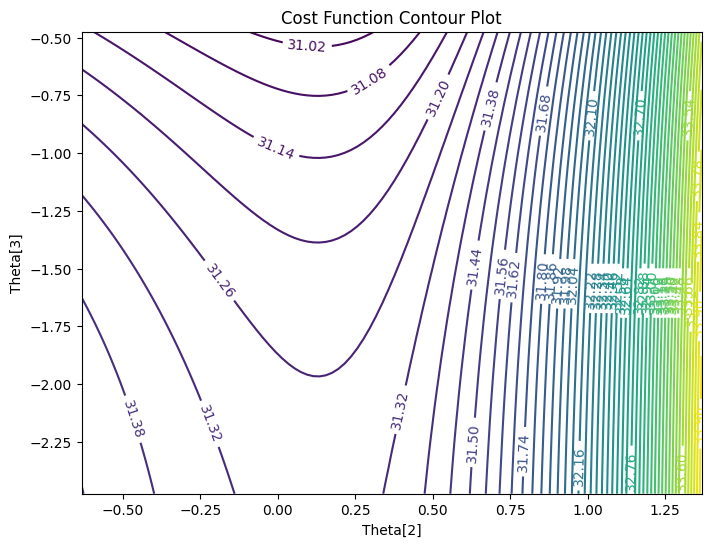

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Assume theta_opt is your optimized parameter vector of shape (12, 1)
theta_opt = res.x.reshape(-1, 1)

# Select parameters to vary, e.g., theta[2] and theta[3]
param_indices = [2, 3]

# Define ranges around the optimized values
param_ranges = [np.linspace(theta_opt[i] - 1, theta_opt[i] + 1, 100) for i in param_indices]

# Create a meshgrid for the parameters
P1, P2 = np.meshgrid(*param_ranges)

# Initialize the cost function values
J_values = np.zeros_like(P1)

# Fix other parameters at optimized values
theta_fixed = theta_opt.copy()

# Evaluate the cost function over the grid
for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        theta_fixed[param_indices[0]] = P1[i, j]
        theta_fixed[param_indices[1]] = P2[i, j]
        J_values[i, j] = costFunction_regularized(theta_fixed)

# Plot the contour map
plt.figure(figsize=(8, 6))
CS = plt.contour(P1, P2, J_values, levels=50, cmap='viridis')
plt.clabel(CS, inline=1, fontsize=10)
plt.xlabel(f'Theta[{param_indices[0]}]')
plt.ylabel(f'Theta[{param_indices[1]}]')
plt.title('Cost Function Contour Plot')
plt.show()


In [87]:
eigenvalues_min = np.zeros_like(P1)

for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        theta_fixed[param_indices[0]] = P1[i, j]
        theta_fixed[param_indices[1]] = P2[i, j]
        hess = hessian_regularized(theta_fixed)
        # Ensure the Hessian is symmetric
        hess = (hess + hess.T) / 2
        # Compute eigenvalues
        eigvals = np.linalg.eigvalsh(hess)
        eigenvalues_min[i, j] = np.min(eigvals)

# Plot the minimum eigenvalue heatmap
plt.figure(figsize=(8, 6))
plt.contourf(P1, P2, eigenvalues_min, levels=50, cmap='coolwarm')
plt.colorbar(label='Minimum Eigenvalue of Hessian')
plt.xlabel(f'Theta[{param_indices[0]}]')
plt.ylabel(f'Theta[{param_indices[1]}]')
plt.title('Minimum Eigenvalue of Hessian Heatmap')
plt.show()


KeyboardInterrupt: 

In [39]:
np.linalg.eigvalsh(hessian(np.exp(theta)))

array([-0.00810451, -0.00015373, -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.00000054,  0.00113274,  0.00458059,
        7.03416706, 22.92993028])

In [36]:
np.exp(theta_tilde)

array([[  1.        ],
       [  1.        ],
       [  0.07722212],
       [  0.14515644],
       [  0.86102811],
       [  2.68178309],
       [  0.10650493],
       [ 11.14641357],
       [352.913929  ],
       [  9.79557967],
       [  0.75494966],
       [  1.84535877]])